<a href="https://colab.research.google.com/github/KIMBUMJU/CV/blob/main/DNN_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FCNN 이용하여 MNIST 분류하기



*   FCNN(Fully Connected Neuron Network) 이용하여 손글씨 MNIST 분류 진행
*   입력 데이터셋: Keras Dataset MNIST
*   이미지 분류 시 DNN을 사용



# **1. Import modules**

In [23]:
!pip install tensorflow==2.15.1

In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.1


# **2. 데이터 불러오기**

In [26]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# 이미지 화소값은 0~255. 고로 255로 나눠주면 0~1로 스케일 변환됨

In [27]:
# 3차원 배열
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [28]:
y_train.shape, y_test.shape

((60000,), (10000,))

# **3. FCNN 모델 구성**


*   FCNN 입력 구조: 2차원(Batch * row)
*   이미지 입력 데이터를 일렬로 쭉 펴서 모델에 주어야 하므로 Flatten 함수를 사용



In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# **4. 모델 Compile**

In [30]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **5. 학습 수행**

In [31]:
EPOCH = 50
BATCH_SIZE = 1024

In [32]:
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [33]:
es = EarlyStopping(monitor='val_loss', patience = 4, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only='True', verbose=1)

In [34]:
history = model.fit(x_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, callbacks=[es, mc], validation_data=(x_test, y_test))

Epoch 1/50
59/59 [==============================] - ETA: 0s - loss: 0.8720 - accuracy: 0.7548
Epoch 1: val_accuracy improved from -inf to 0.90390, saving model to best_model.h5
59/59 [==============================] - 3s 39ms/step - loss: 0.8720 - accuracy: 0.7548 - val_loss: 0.3562 - val_accuracy: 0.9039
Epoch 2/50
 6/59 [==>...........................] - ETA: 1s - loss: 0.4134 - accuracy: 0.8818

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


58/59 [============================>.] - ETA: 0s - loss: 0.3557 - accuracy: 0.8977
Epoch 2: val_accuracy improved from 0.90390 to 0.92530, saving model to best_model.h5
59/59 [==============================] - 2s 31ms/step - loss: 0.3548 - accuracy: 0.8981 - val_loss: 0.2671 - val_accuracy: 0.9253
Epoch 3/50
58/59 [============================>.] - ETA: 0s - loss: 0.2832 - accuracy: 0.9189
Epoch 3: val_accuracy improved from 0.92530 to 0.93650, saving model to best_model.h5
59/59 [==============================] - 3s 59ms/step - loss: 0.2834 - accuracy: 0.9188 - val_loss: 0.2243 - val_accuracy: 0.9365
Epoch 4/50
58/59 [============================>.] - ETA: 0s - loss: 0.2410 - accuracy: 0.9311
Epoch 4: val_accuracy improved from 0.93650 to 0.94300, saving model to best_model.h5
59/59 [==============================] - 4s 70ms/step - loss: 0.2411 - accuracy: 0.9311 - val_loss: 0.1992 - val_accuracy: 0.9430
Epoch 5/50
59/59 [==============================] - ETA: 0s - loss: 0.2136 - accu

# **6. 학습 결과 테스트**

In [35]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9805


[0.06822363287210464, 0.9804999828338623]

# **7. 성능 그래프**

In [36]:
x_range = range(1, len(history.history['accuracy'])+1)

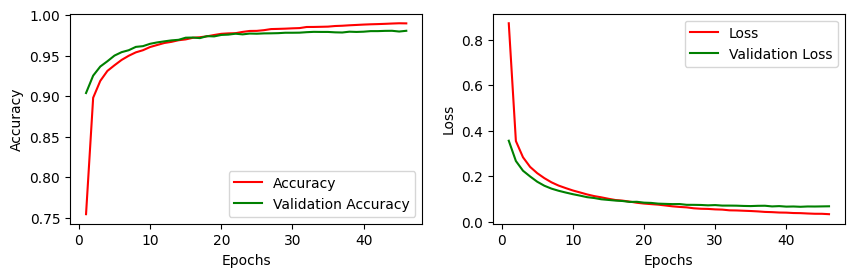

In [37]:
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.plot(x_range, history.history['accuracy'], color='red', label='Accuracy')
plt.plot(x_range, history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(222)
plt.plot(x_range, history.history['loss'], color='red', label='Loss')
plt.plot(x_range, history.history['val_loss'], color='green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# **8. 실전 테스트: 손글씨 입력해서 분류 잘 하는지 평가**

In [38]:
x_test[0].shape

(28, 28)

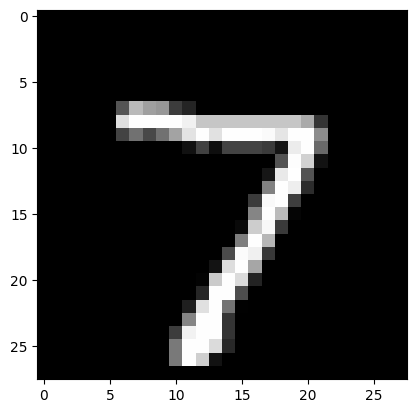

1/1 [==============================] - 0s 94ms/step
Prediction Probability:  [[5.7626854e-09 3.5749723e-10 5.4049765e-06 2.1659170e-04 4.2732944e-12
  6.6473028e-08 2.3678536e-13 9.9977738e-01 3.2196550e-07 2.7848887e-07]]
The Answer is  [7]


In [39]:
n = 0
plt.imshow(x_test[n], cmap='gray')
plt.show()

pred = model.predict(x_test[n].reshape(1, 28, 28))
answer = np.argmax(pred, axis=1)

print("Prediction Probability: ", pred)
print("The Answer is ", answer)

# 내용 정리


1.   Keras 손글씨 MNIST Dataset 활용
2.   FCNN 모델도 이미지 분류 가능


😠 이미지를 1차원으로 받아야 하기에 Flatten() 함수를 사용하여 입력받아야 함

